In [1]:
from glob import glob
import os, re

import matplotlib.pyplot as plt
import numpy as np
import ROOT as rt
import root_numpy as rtnp
from histo_utilities import create_TH1D

from cebefo_style import cebefo_style
cebefo_style()

Welcome to JupyROOT 6.10/08


In [2]:
hlf_features = ['HT', 'METp', 'METo', 'MT', 'nJets', 
                'bJets', 'allJetMass', 'LepPt', 'LepEta', 
                'LepIsoCh', 'LepIsoGamma', 'LepIsoNeu', 'LepCharge', 
                'LepIsEle', 'nMu', 'allMuMass', 'allMuPt', 'nEle', 
                'allEleMass', 'allElePt', 'nChHad', 'nNeuHad', 'nPhoton']

active_hlf_features = ['HT', 'allJetMass',
                       'allMuPt', 'allMuMass',
                       'allElePt','allEleMass',
                       'LepPt', 'LepIsoCh', 'LepIsoGamma', 'LepIsoNeu',
                       
                       'METp', 'METo',
                       
                       'MT',
                       
                       'nMu', 'nJets', 'bJets', 'nEle', 
                       
                       'LepCharge','LepIsEle', 
                       
                       'nChHad', 'nNeuHad']

sel = []
for a in active_hlf_features:
    for i,f in enumerate(hlf_features):
        if a == f:
            sel.append(i)

x_axis_label = [ 'S_{T} [GeV]', 'Jets Mass [GeV]',
                'Muons P_{T} [GeV]', 'Muons Mass [GeV]',
                'Electrons P_{T} [GeV]', 'Electrons Mass [GeV]',
                'Lep P_{T} [GeV]', 'ChPFIso', 'GammaPFIso', 'NeuPFIso',
                
                'METp [GeV]', 'METo [GeV]',
                
                'M_{T} [GeV]',
                
                'Muons number', 'Jets number', 'b-tagged jets number', 'Electrons number',
                
                'Lep Charge [e]','IsEle',
                
                'Charged Had number', 'Neutral Had number']

sel = []
for a in active_hlf_features:
    for i,f in enumerate(hlf_features):
        if a == f:
            sel.append(i)

In [3]:
len(active_hlf_features)

21

In [4]:
folder = '../data/HLF_ONLY/'
datasets = glob(folder+'*.npy')

dataset_path = {}
for path in datasets:
    n = os.path.basename(path)
    aux = re.search(r'[a-zA-Z0-9]+_', n)
    name = aux.group(0)[:-1]
    print name, ' ---> ', path
    dataset_path[name] = path

Ato4l  --->  ../data/HLF_ONLY/Ato4l_lepFilter_13TeV_sample.npy
leptoquark  --->  ../data/HLF_ONLY/leptoquark_lepFilter_13TeV_sample.npy
qcd  --->  ../data/HLF_ONLY/qcd_lepFilter_13TeV_sample.npy
ttbar  --->  ../data/HLF_ONLY/ttbar_lepFilter_13TeV_sample.npy
Wlnu  --->  ../data/HLF_ONLY/Wlnu_lepFilter_13TeV_sample.npy
Wprime  --->  ../data/HLF_ONLY/Wprime_lepFilter_13TeV_sample.npy
Zll  --->  ../data/HLF_ONLY/Zll_lepFilter_13TeV_sample.npy
Zprime  --->  ../data/HLF_ONLY/Zprime_lepFilter_13TeV_sample.npy


_Ato4l_HT
_Ato4l_allJetMass
_Ato4l_allMuPt
_Ato4l_allMuMass
_Ato4l_allElePt
_Ato4l_allEleMass
_Ato4l_LepPt
_Ato4l_LepIsoCh
_Ato4l_LepIsoGamma
_Ato4l_LepIsoNeu
_Ato4l_METp
_Ato4l_METo
_Ato4l_MT
_Ato4l_nMu
_Ato4l_nJets
_Ato4l_bJets
_Ato4l_nEle
_Ato4l_LepCharge
_Ato4l_LepIsEle
_Ato4l_nChHad
_Ato4l_nNeuHad
_Wprime_HT
_Wprime_allJetMass
_Wprime_allMuPt
_Wprime_allMuMass
_Wprime_allElePt
_Wprime_allEleMass
_Wprime_LepPt
_Wprime_LepIsoCh
_Wprime_LepIsoGamma
_Wprime_LepIsoNeu
_Wprime_METp
_Wprime_METo
_Wprime_MT
_Wprime_nMu
_Wprime_nJets
_Wprime_bJets
_Wprime_nEle
_Wprime_LepCharge
_Wprime_LepIsEle
_Wprime_nChHad
_Wprime_nNeuHad
_Zprime_HT
_Zprime_allJetMass
_Zprime_allMuPt
_Zprime_allMuMass
_Zprime_allElePt
_Zprime_allEleMass
_Zprime_LepPt
_Zprime_LepIsoCh
_Zprime_LepIsoGamma
_Zprime_LepIsoNeu
_Zprime_METp
_Zprime_METo
_Zprime_MT
_Zprime_nMu
_Zprime_nJets
_Zprime_bJets
_Zprime_nEle
_Zprime_LepCharge
_Zprime_LepIsEle
_Zprime_nChHad
_Zprime_nNeuHad
_leptoquark_HT
_leptoquark_allJetMass
_leptoqu

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_out
Info in <TCanvas::SaveAs>: ROOT file ../fig/paper_fig/BSM_HLF_Summary.root has been created
Info in <TCanvas::Print>: png file ../fig/paper_fig/BSM_HLF_Summary.png has been created


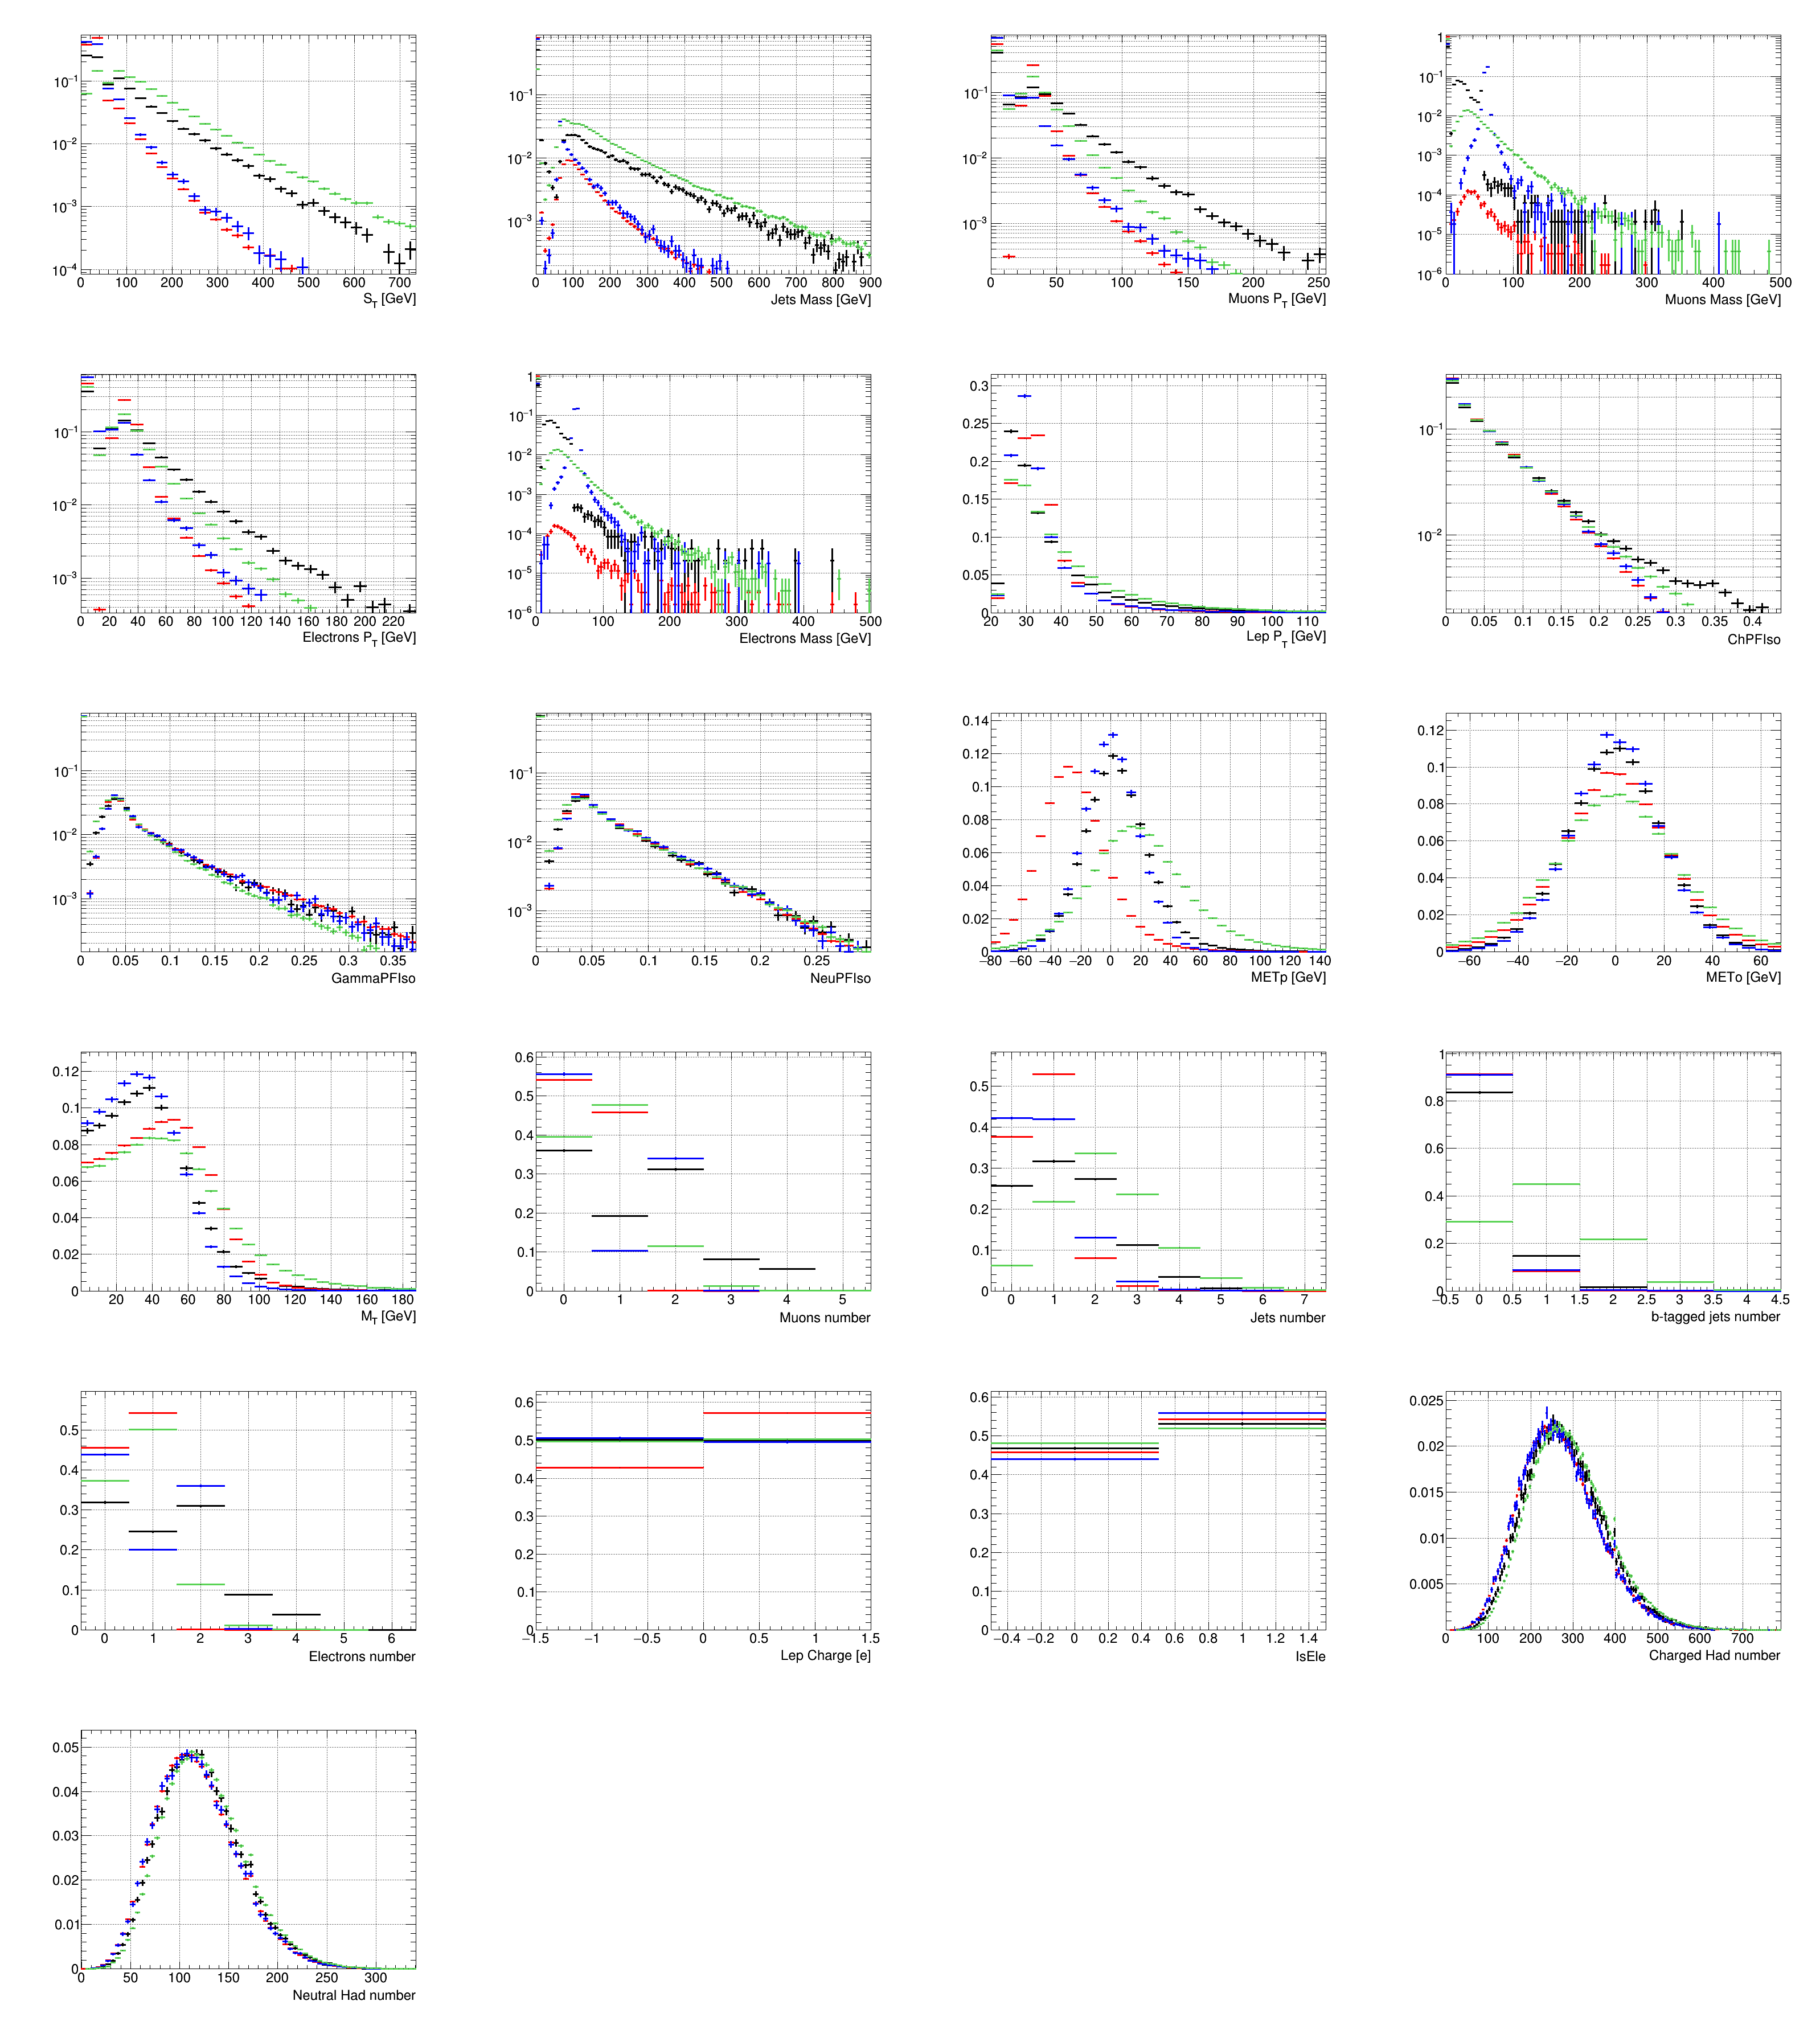

In [37]:
dnd = []

c = rt.TCanvas('c_out', 'c_out', 3200, 3600)
c.Divide(4,6)

colors = [1,2,4,8,46, 30, 40]

binning_list = []

max_prob_hlf = np.zeros(len(active_hlf_features))


# for DS in dataset_path.keys():
# for j, DS in enumerate(['Wlnu', 'qcd', 'Zll', 'ttbar']):
for j, DS in enumerate(['Ato4l', 'Wprime', 'Zprime', 'leptoquark']):    

    arr = np.load(dataset_path[DS])[:, sel]

    for i, nhlf in enumerate(active_hlf_features):
        a = arr[:, i]
        
#         if i == 18:
#             continue
        
        tag = '_{}_{}'.format(DS, nhlf)
        print tag
        
        if j==0:
            if nhlf == 'allJetMass':
                binning = [90, 0, 900]
            elif nhlf in ['nChHad', 'nNeuHad']:
                up = int(np.max(a) - int(np.max(a))%5)
                binning = [up/5, -0.5, up+0.5]
            elif nhlf in ['nMu', 'nEle', 'nJets', 'bJets']:
                length = np.max(a) - np.min(a) + 1
                binning = [int(length), np.min(a)-0.5, np.max(a)+0.5]
            elif nhlf in ['LepIsEle', 'LepCharge']:
                binning = [2, np.min(a)-0.5, np.max(a)+0.5]
            elif nhlf in ['allEleMass', 'allMuMass']:
                binning = [100, -0.5, 500.]  
            elif nhlf == 'LepPt':
                bin_w = 10*(np.percentile(a,75) - np.percentile(a,25))/(len(a))**(1./3.)
                if bin_w == 0:
                    bin_w = np.std(a)/5
                binning = [None, 20, np.percentile(a, 99.)]
                binning[0] = int((binning[2] - binning[1])/bin_w) + 2
            else:
                bin_w = 8*(np.percentile(a,75) - np.percentile(a,25))/(len(a))**(1./3.)
                if bin_w == 0:
                    bin_w = np.std(a)/5
                binning = [None, np.percentile(a, .1), np.percentile(a, 99.9)]
                binning[0] = int((binning[2] - binning[1])/bin_w) + 2
            binning_list.append(binning)

        h = create_TH1D(a, 'h'+tag, '', binning=binning_list[i])
        h.SetXTitle(x_axis_label[i])
#         h.SetYTitle('Probability')
        h.GetYaxis().SetTitleOffset(1.3)
        h.Scale(1./h.GetEntries())
        max_prob_hlf[i] = max(max_prob_hlf[i], h.GetMaximum())
        
        h.SetStats(0)

        h.SetLineColor(colors[j])



        opt = ''
        if j != 0:
            opt += 'SAME'
        pad = c.cd(i+1)
        h.Draw(opt)

        if j==0:
            pad.SetTopMargin(0.05)
            pad.SetBottomMargin(0.15)
            pad.SetRightMargin(0.05)            
            pad.SetLeftMargin(0.15)            
            if nhlf.startswith('LepIso') or nhlf.startswith('all') or nhlf=='HT':
                pad.SetLogy()
            else:
                h.GetYaxis().SetRangeUser(0, h.GetMaximum()*1.1)
            
        dnd.append(h)
        
for i in range(len(active_hlf_features)):
    dnd[i].GetYaxis().SetRangeUser(1e-6+dnd[i].GetMinimum(), 1.1*max_prob_hlf[i])

c.Update()
c.Draw()
c.SaveAs('../fig/paper_fig/BSM_HLF_Summary.root')
c.SaveAs('../fig/paper_fig/BSM_HLF_Summary.png')
#         c.SaveAs('../../www/DatasetCheck/{}_{}.png'.format(nhlf, DS))
dnd.append(c)